In [1]:
import pandas as pd
import numpy as np
import pymongo
from pymongo import MongoClient
import dask.dataframe as dd
import time

In [2]:
cnx_string = "mongodb://127.0.0.1:27017"
client = MongoClient(cnx_string)

In [3]:
db = client['bd_project']
#select the collection within the database
test = db.winemag_data
#convert entire collection to Pandas dataframe
test = pd.DataFrame(list(test.find()))

In [4]:
test.shape

(129971, 11)

In [5]:
test.head()

_id      country  \
0  6233800a96e1e2f67c153bca  0     Italy   
1  6233800a96e1e2f67c153bcb  1  Portugal   
2  6233800a96e1e2f67c153bcc  2        US   
3  6233800a96e1e2f67c153bcd  4        US   
4  6233800a96e1e2f67c153bce  5     Spain   

                                         description  points price  \
0  Aromas include tropical fruit, broom, brimston...      87         
1  This is ripe and fruity, a wine that is smooth...      87    15   
2  Tart and snappy, the flavors of lime flesh and...      87    14   
3  Much like the regular bottling from 2012, this...      87    65   
4  Blackberry and raspberry aromas show a typical...      87    15   

            province           region_1        taster_name  \
0  Sicily & Sardinia               Etna      Kerin O’Keefe   
1              Douro                            Roger Voss   
2             Oregon  Willamette Valley       Paul Gregutt   
3             Oregon  Willamette Valley       Paul Gregutt   
4     Northern Spain            Navarra  Michael Schachner   

              variety               winery  
0         White Blend              Nicosia  
1      Portuguese Red  Quinta dos Avidagos  
2          Pinot Gris            Rainstorm  
3          Pinot Noir         Sweet Cheeks  
4  Tempranillo-Merlot               Tandem

In [6]:
test.drop(['_id'], axis = 1, inplace = True)
test.head()

country                                        description  points  \
0  0     Italy  Aromas include tropical fruit, broom, brimston...      87   
1  1  Portugal  This is ripe and fruity, a wine that is smooth...      87   
2  2        US  Tart and snappy, the flavors of lime flesh and...      87   
3  4        US  Much like the regular bottling from 2012, this...      87   
4  5     Spain  Blackberry and raspberry aromas show a typical...      87   

  price           province           region_1        taster_name  \
0        Sicily & Sardinia               Etna      Kerin O’Keefe   
1    15              Douro                            Roger Voss   
2    14             Oregon  Willamette Valley       Paul Gregutt   
3    65             Oregon  Willamette Valley       Paul Gregutt   
4    15     Northern Spain            Navarra  Michael Schachner   

              variety               winery  
0         White Blend              Nicosia  
1      Portuguese Red  Quinta dos Avidagos  
2          Pinot Gris            Rainstorm  
3          Pinot Noir         Sweet Cheeks  
4  Tempranillo-Merlot               Tandem

In [7]:
test.rename(columns = {test.columns[0] : "id"},inplace = True)
test.head()

id   country                                        description  points  \
0   0     Italy  Aromas include tropical fruit, broom, brimston...      87   
1   1  Portugal  This is ripe and fruity, a wine that is smooth...      87   
2   2        US  Tart and snappy, the flavors of lime flesh and...      87   
3   4        US  Much like the regular bottling from 2012, this...      87   
4   5     Spain  Blackberry and raspberry aromas show a typical...      87   

  price           province           region_1        taster_name  \
0        Sicily & Sardinia               Etna      Kerin O’Keefe   
1    15              Douro                            Roger Voss   
2    14             Oregon  Willamette Valley       Paul Gregutt   
3    65             Oregon  Willamette Valley       Paul Gregutt   
4    15     Northern Spain            Navarra  Michael Schachner   

              variety               winery  
0         White Blend              Nicosia  
1      Portuguese Red  Quinta dos Avidagos  
2          Pinot Gris            Rainstorm  
3          Pinot Noir         Sweet Cheeks  
4  Tempranillo-Merlot               Tandem

In [8]:
test.sort_values(by = ['id'], ascending = True, axis = 0, inplace = True)

In [9]:
test

id   country                                        description  \
0            0     Italy  Aromas include tropical fruit, broom, brimston...   
1            1  Portugal  This is ripe and fruity, a wine that is smooth...   
2            2        US  Tart and snappy, the flavors of lime flesh and...   
7            3        US  Pineapple rind, lemon pith and orange blossom ...   
3            4        US  Much like the regular bottling from 2012, this...   
...        ...       ...                                                ...   
129966  129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967  129967        US  Citation is given as much as a decade of bottl...   
129968  129968    France  Well-drained gravel soil gives this wine its c...   
129969  129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970  129970    France  Big, rich and off-dry, this is powered by inte...   

        points price           province             region_1  \
0           87        Sicily & Sardinia                 Etna   
1           87    15              Douro                        
2           87    14             Oregon    Willamette Valley   
7           87    13           Michigan  Lake Michigan Shore   
3           87    65             Oregon    Willamette Valley   
...        ...   ...                ...                  ...   
129966      90    28              Mosel                        
129967      90    75             Oregon               Oregon   
129968      90    30             Alsace               Alsace   
129969      90    32             Alsace               Alsace   
129970      90    21             Alsace               Alsace   

               taster_name         variety  \
0            Kerin O’Keefe     White Blend   
1               Roger Voss  Portuguese Red   
2             Paul Gregutt      Pinot Gris   
7       Alexander Peartree        Riesling   
3             Paul Gregutt      Pinot Noir   
...                    ...             ...   
129966  Anna Lee C. Iijima        Riesling   
129967        Paul Gregutt      Pinot Noir   
129968          Roger Voss  Gewürztraminer   
129969          Roger Voss      Pinot Gris   
129970          Roger Voss  Gewürztraminer   

                                          winery  
0                                        Nicosia  
1                            Quinta dos Avidagos  
2                                      Rainstorm  
7                                     St. Julian  
3                                   Sweet Cheeks  
...                                          ...  
129966  Dr. H. Thanisch (Erben Müller-Burggraef)  
129967                                  Citation  
129968                           Domaine Gresser  
129969                      Domaine Marcel Deiss  
129970                          Domaine Schoffit  

[129971 rows x 10 columns]

In [10]:
test.isnull().sum()

id             0
country        0
description    0
points         0
price          0
province       0
region_1       0
taster_name    0
variety        0
winery         0
dtype: int64

In [11]:
test.loc[test['country'] == '', :]

id country                                        description  \
913        913          Amber in color, this wine has aromas of peach ...   
3131      3131          Soft, fruity and juicy, this is a pleasant, si...   
4243      4243          Violet-red in color, this semisweet wine has a...   
9509      9509          This mouthwatering blend starts with a nose of...   
9750      9750          This orange-style wine has a cloudy yellow-gol...   
...        ...     ...                                                ...   
124176  124176          This Swiss red blend is composed of four varie...   
129407  129407          Dry spicy aromas of dusty plum and tomato add ...   
129408  129408          El Capricho is one of Uruguay's more consisten...   
129590  129590          A blend of 60% Syrah, 30% Cabernet Sauvignon a...   
129900  129900          This wine offers a delightful bouquet of black...   

        points price province region_1        taster_name             variety  \
913         87    30                        Mike DeSimone             Chinuri   
3131        83                                 Roger Voss           Red Blend   
4243        88    18                        Mike DeSimone            Ojaleshi   
9509        92    28                      Susan Kostrzewa         White Blend   
9750        89    28                         Jeff Jenssen          Chardonnay   
...        ...   ...      ...      ...                ...                 ...   
124176      90    30                         Jeff Jenssen           Red Blend   
129407      89    22                    Michael Schachner  Cabernet Sauvignon   
129408      89    22                    Michael Schachner         Tempranillo   
129590      90    30                        Mike DeSimone           Red Blend   
129900      91    32                        Mike DeSimone              Merlot   

                                 winery  
913                  Gotsa Family Wines  
3131                  Barton & Guestier  
4243    Kakhetia Traditional Winemaking  
9509                           Tsililis  
9750                           Ross-idi  
...                                 ...  
124176                Les Frères Dutruy  
129407                      El Capricho  
129408                      El Capricho  
129590                        Büyülübağ  
129900                           Psagot  

[63 rows x 10 columns]

In [ ]:
#test.drop(['designation', 'region_2', 'taster_twitter_handle'], axis = 1, inplace = True)
#test.head()

In [12]:
test = test.reset_index(drop = True)
test.head()

id   country                                        description  points  \
0   0     Italy  Aromas include tropical fruit, broom, brimston...      87   
1   1  Portugal  This is ripe and fruity, a wine that is smooth...      87   
2   2        US  Tart and snappy, the flavors of lime flesh and...      87   
3   3        US  Pineapple rind, lemon pith and orange blossom ...      87   
4   4        US  Much like the regular bottling from 2012, this...      87   

  price           province             region_1         taster_name  \
0        Sicily & Sardinia                 Etna       Kerin O’Keefe   
1    15              Douro                               Roger Voss   
2    14             Oregon    Willamette Valley        Paul Gregutt   
3    13           Michigan  Lake Michigan Shore  Alexander Peartree   
4    65             Oregon    Willamette Valley        Paul Gregutt   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [ ]:
#test.drop(['title'], axis = 1, inplace = True)

In [13]:
test.head()

id   country                                        description  points  \
0   0     Italy  Aromas include tropical fruit, broom, brimston...      87   
1   1  Portugal  This is ripe and fruity, a wine that is smooth...      87   
2   2        US  Tart and snappy, the flavors of lime flesh and...      87   
3   3        US  Pineapple rind, lemon pith and orange blossom ...      87   
4   4        US  Much like the regular bottling from 2012, this...      87   

  price           province             region_1         taster_name  \
0        Sicily & Sardinia                 Etna       Kerin O’Keefe   
1    15              Douro                               Roger Voss   
2    14             Oregon    Willamette Valley        Paul Gregutt   
3    13           Michigan  Lake Michigan Shore  Alexander Peartree   
4    65             Oregon    Willamette Valley        Paul Gregutt   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [14]:
for col in test.columns[1:]:
    test[col].replace('', np.nan, inplace = True)

In [15]:
test.isnull().sum()

id                 0
country           63
description        0
points             0
price           8996
province          63
region_1       21247
taster_name    26244
variety            1
winery             0
dtype: int64

In [16]:
test.dropna(axis = 0).shape

(77267, 10)

In [17]:
test.head()

id   country                                        description  points  \
0   0     Italy  Aromas include tropical fruit, broom, brimston...      87   
1   1  Portugal  This is ripe and fruity, a wine that is smooth...      87   
2   2        US  Tart and snappy, the flavors of lime flesh and...      87   
3   3        US  Pineapple rind, lemon pith and orange blossom ...      87   
4   4        US  Much like the regular bottling from 2012, this...      87   

   price           province             region_1         taster_name  \
0    NaN  Sicily & Sardinia                 Etna       Kerin O’Keefe   
1   15.0              Douro                  NaN          Roger Voss   
2   14.0             Oregon    Willamette Valley        Paul Gregutt   
3   13.0           Michigan  Lake Michigan Shore  Alexander Peartree   
4   65.0             Oregon    Willamette Valley        Paul Gregutt   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [18]:
pd.set_option("display.max_rows", None)

In [19]:
test.variety.value_counts().sort_values(ascending = False)

Pinot Noir                             13272
Chardonnay                             11753
Cabernet Sauvignon                      9472
Red Blend                               8946
Bordeaux-style Red Blend                6915
Riesling                                5189
Sauvignon Blanc                         4967
Syrah                                   4142
Rosé                                    3564
Merlot                                  3102
Nebbiolo                                2804
Zinfandel                               2714
Sangiovese                              2707
Malbec                                  2652
Portuguese Red                          2466
White Blend                             2360
Sparkling Blend                         2153
Tempranillo                             1810
Rhône-style Red Blend                   1471
Pinot Gris                              1455
Champagne Blend                         1396
Cabernet Franc                          1353
Grüner Vel

In [20]:
variety_names = test.variety.value_counts().sort_values(ascending = False).index
variety_counts = test.variety.value_counts().sort_values(ascending = False).values
var_df = pd.DataFrame(columns = ['var', 'var_counts'], index = range(len(variety_names)))
var_df.head()

var var_counts
0  NaN        NaN
1  NaN        NaN
2  NaN        NaN
3  NaN        NaN
4  NaN        NaN

In [21]:
var_df['var'] = variety_names; var_df['var_counts'] = variety_counts
var_df.head()

var  var_counts
0                Pinot Noir       13272
1                Chardonnay       11753
2        Cabernet Sauvignon        9472
3                 Red Blend        8946
4  Bordeaux-style Red Blend        6915

In [22]:
# top 30 wine varieties according to their value_counts
filtered_variety = var_df.loc[var_df['var_counts'] > 800, 'var'].tolist()

In [23]:
test_filtered = test.loc[test['variety'].isin(filtered_variety), :].copy(deep = True)

In [24]:
test_filtered.isnull().sum()

id                 0
country           40
description        0
points             0
price           6988
province          40
region_1       16305
taster_name    20174
variety            0
winery             0
dtype: int64

In [25]:
test_filtered.to_csv("wine_data_EDA.csv")

In [26]:
test_filtered.dropna(axis = 0).shape

(64024, 10)

In [27]:
#test_filtered['country'].replace(np.nan, test_filtered['country'].mode()[0], inplace = True)
#test_filtered['province'].replace(np.nan, test_filtered['province'].mode()[0], inplace = True)

test_filtered['country'].replace(np.nan, "Unknown", inplace = True)
test_filtered['province'].replace(np.nan, "Unknown", inplace = True)
#test_filtered['taster_name'].replace(np.nan, "Unknown", inplace = True)
#test_filtered['region_1'].replace(np.nan, "Unknown", inplace = True)

test_filtered['price'].replace(np.nan, test_filtered['price'].median(), inplace = True)

In [28]:
test_filtered.isnull().sum()

id                 0
country            0
description        0
points             0
price              0
province           0
region_1       16305
taster_name    20174
variety            0
winery             0
dtype: int64

# KNN - 

In [29]:
from sklearn.neighbors import NearestNeighbors # KNN Clustering 
from scipy.sparse import csr_matrix # Compressed Sparse Row matrix

In [116]:
col = ['province','variety','points']

# Time taken for preprocessing - 
start = time.time()
wine1 = test_filtered[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] > 85]

wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)
print(time.time() - start)

0.1660478115081787


In [117]:
wine1.shape

(1381, 3)

In [45]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
start = time.time()
model_knn = knn.fit(wine_pivot_matrix)
print(time.time() - start)

0.0010128021240234375


In [46]:
np.random.seed(12345)

In [47]:
variety_list = []
for n in range(5):
    variety_list.append(np.random.choice(wine_pivot.shape[0]))
variety_list

[2, 5, 29, 1, 4]

In [48]:
wine_pivot.index[variety_list]

Index(['Cabernet Franc', 'Chardonnay', 'Zinfandel',
       'Bordeaux-style White Blend', 'Champagne Blend'],
      dtype='object', name='variety')

In [49]:
start = time.time()
for n in range(5):
    query_index = variety_list[n]
    #print(n, query_index)
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recommendation for ## {0} ##:'.format(wine_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')
print(time.time() - start)

Recommendation for ## Cabernet Franc ##:
1: Malbec with distance: 0.5180949932692834
2: Bordeaux-style Red Blend with distance: 0.5315296926312931
3: Cabernet Sauvignon with distance: 0.5493285215497824
4: Merlot with distance: 0.5880956549124436
5: Viognier with distance: 0.5964317842357716


Recommendation for ## Chardonnay ##:
1: Sauvignon Blanc with distance: 0.44510164437545663
2: Pinot Noir with distance: 0.47008004364727307
3: White Blend with distance: 0.5472634277556871
4: Riesling with distance: 0.5518782947073453
5: Red Blend with distance: 0.5530106012592908


Recommendation for ## Zinfandel ##:
1: Sangiovese with distance: 0.5246958274965143
2: Bordeaux-style White Blend with distance: 0.5529138424735294
3: Rhône-style Red Blend with distance: 0.5768783230219852
4: Malbec with distance: 0.6001718499575264
5: Tempranillo with distance: 0.6108758523183468


Recommendation for ## Bordeaux-style White Blend ##:
1: Zinfandel with distance: 0.5529138424735294
2: Viognier with di

## KNN (with Dask) - 

In [51]:
import dask 
import joblib
from dask.distributed import Client# IP of the scheduler node
c = dask.distributed.Client('tcp://172.20.10.2:8786')# call the cluster c

In [52]:
c

<Client: 'tcp://172.20.10.2:8786' processes=5 threads=60, memory=85.42 GB>

In [53]:
# convert pandas dataframe into dask dataframes 
import dask.dataframe as dd
df = dd.from_pandas(test_filtered, npartitions=5)

In [54]:
col = ['province','variety','points']

# Time taken for preprocessing - 
start = time.time()
wine1 = df[col]
wine1 = wine1.dropna()
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] > 85]

wine1 = wine1.categorize(columns=['province'])
wine_pivot = wine1.pivot_table(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)
print(time.time() - start)

1.9979932308197021


In [55]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
start = time.time()
with joblib.parallel_backend('dask'):
    model_knn = knn.fit(wine_pivot_matrix)
print(time.time() - start)

0.0019948482513427734


In [58]:
start = time.time()
for n in range(5):
    query_index = variety_list[n]
    #print(n, query_index)
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recommendation for ## {0} ##:'.format(wine_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')
print(time.time() - start)

Recommendation for ## Cabernet Franc ##:
1: Chardonnay with distance: 0.7981307614083385
2: Riesling with distance: 0.82929211785956
3: Bordeaux-style Red Blend with distance: 0.836604543718854
4: Syrah with distance: 0.8497467170383037
5: Sauvignon Blanc with distance: 0.8509280458785277


Recommendation for ## Chardonnay ##:
1: Chardonnay with distance: 0.6538957408931604
2: White Blend with distance: 0.6680225146388299
3: Sauvignon Blanc with distance: 0.69165604224306
4: Pinot Noir with distance: 0.6988622673364961
5: Riesling with distance: 0.7231499198879912


Recommendation for ## Zinfandel ##:
1: Bordeaux-style Red Blend with distance: 0.8740392395963597
2: Red Blend with distance: 0.8786279153775013
3: Shiraz with distance: 0.9157202851800689
4: Sparkling Blend with distance: 0.9322932451140062
5: Syrah with distance: 0.9449761049557898


Recommendation for ## Bordeaux-style White Blend ##:
1: Grüner Veltliner with distance: 0.9053171380567206
2: Sauvignon Blanc with distance:

# KNN with Price feature included - 

In [65]:
col = ['province','variety','price', 'points']

start = time.time()
wine1 = test_filtered[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] > 85]

wine_pivot = wine1.pivot(index= 'variety',columns='province',values='price').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)
print(time.time() - start)

0.09923863410949707


In [60]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
start = time.time()
model_knn = knn.fit(wine_pivot_matrix)
print(time.time() - start)

0.0


In [61]:
start = time.time()
for n in range(5):
    query_index = variety_list[n]
    #print(n, query_index)
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recommendation for ## {0} ##:'.format(wine_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')
print(time.time() - start)

Recommendation for ## Cabernet Franc ##:
1: Bordeaux-style Red Blend with distance: 0.6375735583497839
2: Sangiovese with distance: 0.6471721337331927
3: Viognier with distance: 0.6502470749829564
4: Cabernet Sauvignon with distance: 0.6525596517305995
5: Gamay with distance: 0.6839894863314537


Recommendation for ## Chardonnay ##:
1: Sauvignon Blanc with distance: 0.56514087792685
2: White Blend with distance: 0.5896801245991073
3: Pinot Noir with distance: 0.6142076454657032
4: Sparkling Blend with distance: 0.626197183525399
5: Pinot Gris with distance: 0.6321727770109917


Recommendation for ## Zinfandel ##:
1: Sangiovese with distance: 0.5064285657896965
2: Tempranillo with distance: 0.6001007379191236
3: Grüner Veltliner with distance: 0.6460215488745498
4: Rhône-style Red Blend with distance: 0.6760920687445826
5: Bordeaux-style White Blend with distance: 0.6830081430958663


Recommendation for ## Bordeaux-style White Blend ##:
1: Zinfandel with distance: 0.6830081430958663
2: 

## KNN with price feature included (using Dask) - 

In [62]:
col = ['province','variety','price', 'points']

# Time taken for preprocessing - 
start = time.time()
wine1 = df[col]
wine1 = wine1.dropna()
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] > 85]

wine1 = wine1.categorize(columns=['province'])
wine_pivot = wine1.pivot_table(index= 'variety',columns='province',values='price').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)
print(time.time() - start)

1.706646203994751


In [63]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
start = time.time()
with joblib.parallel_backend('dask'):
    model_knn = knn.fit(wine_pivot_matrix)
print(time.time() - start)

0.0009975433349609375


In [66]:
start = time.time()
for n in range(5):
    query_index = variety_list[n]
    #print(n, query_index)
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recommendation for ## {0} ##:'.format(wine_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')
print(time.time() - start)

Recommendation for ## Cabernet Franc ##:
1: Red Blend with distance: 0.8658956302447522
2: Chardonnay with distance: 0.867999986120396
3: Sauvignon Blanc with distance: 0.8702489562492846
4: Rosé with distance: 0.8866520440732445
5: Syrah with distance: 0.887753253030111


Recommendation for ## Chardonnay ##:
1: Sauvignon Blanc with distance: 0.7161394033191686
2: White Blend with distance: 0.7530384501271477
3: Chardonnay with distance: 0.7539638386648122
4: Portuguese White with distance: 0.7820564335526881
5: Pinot Noir with distance: 0.8235445966507126


Recommendation for ## Zinfandel ##:
1: Red Blend with distance: 0.9350976423397158
2: Sparkling Blend with distance: 0.941744554281679
3: Bordeaux-style Red Blend with distance: 0.955110991896964
4: Shiraz with distance: 0.9572636913648559
5: Chardonnay with distance: 0.9700180961133554


Recommendation for ## Bordeaux-style White Blend ##:
1: Red Blend with distance: 0.9221985432979799
2: White Blend with distance: 0.9572703806286

# Sentiment Analysis - 

In [67]:
test_filtered['price_log'] = np.log(test_filtered['price'])

In [99]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
start = time.time()
sentiment = test_filtered.sample(frac = 0.25).copy()
sentiment['polarity_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['compound'])
#sentiment['neutral_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neu'])
#sentiment['negative_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neg'])
#sentiment['positive_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['pos'])

sentiment['sentiment']= np.nan
sentiment.loc[sentiment.polarity_score>0,'sentiment']='POSITIVE'
sentiment.loc[sentiment.polarity_score==0,'sentiment']='NEUTRAL'
sentiment.loc[sentiment.polarity_score<0,'sentiment']='NEGATIVE'
print(time.time() - start)

11.203981161117554


In [100]:
sentiment.head()

id country                                        description  \
28925  28925      US  Feels hot and prickly, with simple cherry, col...   
39444  39444   Italy  Nerello Mascalese and Nerello Cappuccio are th...   
67866  67866   Chile  A solid effort, with cherry and red currant ar...   
34323  34323   Chile  Cherry and cassis aromas are both a touch rais...   
61031  61031      US  Too much acidity on this Syrah and Mourvedre b...   

       points  price           province         region_1        taster_name  \
28925      82 17.000         California      Paso Robles                NaN   
39444      90 27.000  Sicily & Sardinia             Etna                NaN   
67866      85 14.000   Colchagua Valley              NaN  Michael Schachner   
34323      84 23.000     Central Valley              NaN  Michael Schachner   
61031      84 22.000         California  Monterey County                NaN   

                  variety             winery  price_log  polarity_score  \
28925              Merlot      Ancient Peaks      2.833           0.052   
39444           Red Blend  Tenuta di Fessina      3.296           0.852   
67866              Merlot         Casa Silva      2.639           0.402   
34323  Cabernet Sauvignon        Gran Verano      3.135          -0.340   
61031           Red Blend              Mosby      3.091           0.660   

      sentiment  
28925  POSITIVE  
39444  POSITIVE  
67866  POSITIVE  
34323  NEGATIVE  
61031  POSITIVE

In [70]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Anmol
[nltk_data]     Bhatia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

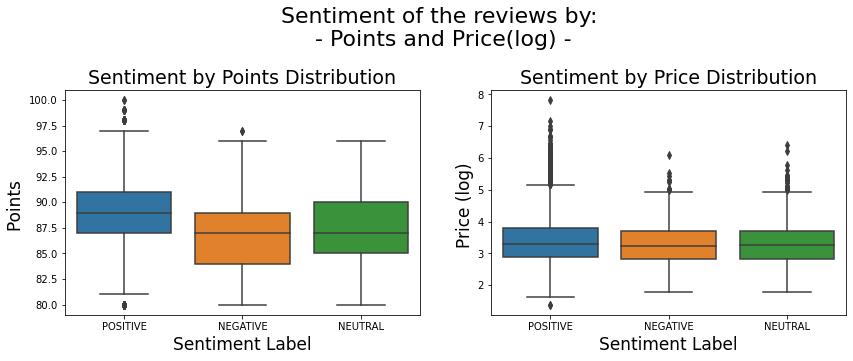

In [101]:
plt.figure(figsize=(14,5))

plt.suptitle('Sentiment of the reviews by: \n- Points and Price(log) -', size=22)

plt.subplot(121)
ax = sns.boxplot(x='sentiment', y='points', data=sentiment)
ax.set_title("Sentiment by Points Distribution", fontsize=19)
ax.set_ylabel("Points ", fontsize=17)
ax.set_xlabel("Sentiment Label", fontsize=17)

plt.subplot(122)
ax1= sns.boxplot(x='sentiment', y='price_log', data=sentiment)
ax1.set_title("Sentiment by Price Distribution", fontsize=19)
ax1.set_ylabel("Price (log) ", fontsize=17)
ax1.set_xlabel("Sentiment Label", fontsize=17)

plt.subplots_adjust(top = 0.75, wspace=.2)
plt.show()


## Sentiment Analysis using Dask - 

In [73]:
df['price_log'] = np.log(df['price'])

In [114]:
SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
start = time.time()
sentiment = df.sample(frac = 0.25).copy()
sentiment['polarity_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['compound'])
#sentiment['neutral_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neu'])
#sentiment['negative_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neg'])
#sentiment['positive_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['pos'])

sentiment['sentiment']= np.nan
sentiment['sentiment'] = sentiment['sentiment'].mask(cond = sentiment.polarity_score>0, other = 'POSITIVE')
sentiment['sentiment'] = sentiment['sentiment'].mask(cond = sentiment.polarity_score==0, other = 'NEUTRAL')
sentiment['sentiment'] = sentiment['sentiment'].mask(cond = sentiment.polarity_score>0, other = 'NEGATIVE')
#sentiment.loc[sentiment.polarity_score>0,'sentiment']='POSITIVE'
#sentiment.loc[sentiment.polarity_score==0,'sentiment']='NEUTRAL'
#sentiment.loc[sentiment.polarity_score<0,'sentiment']='NEGATIVE'
print(time.time() - start)

0.032967329025268555


C:\anaconda3\lib\site-packages\dask\dataframe\core.py:3199: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('description', 'float64'))

  warnings.warn(meta_warning(meta))


## Make a summary table to compare dask vs pandas results 

## Collaborative filtering through Surprise library - 

In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from surprise import KNNBasic
#algo = KNNBasic()
algo = SVD()

In [ ]:
reader = Reader()

In [ ]:
test_filtered2 = test_filtered.dropna(subset = ['taster_name', 'region_1'], axis = 0)
test_filtered2.isnull().sum()

In [ ]:
data = Dataset.load_from_df(test_filtered2[['taster_name', 'variety', 'price']], reader)

In [ ]:
start = time.process_time()
print(cross_validate(algo, data, measures=['MAE'], cv = 5, verbose = False, n_jobs = -1), end = "\n")
print(time.process_time() - start)
# Should n_jobs be set to -1 here ?

In [ ]:
trainset = data.build_full_trainset()
algo.fit(trainset)

In [ ]:
test_filtered2.head()

## Collaborative filtering based on nearest neighbors - 

In [86]:
colab_fil_cols = ['taster_name', 'variety', 'points']
tf1 = test_filtered.dropna(subset = ['taster_name', 'region_1'], axis = 0).loc[:, colab_fil_cols]
tf1['var_id'] = tf1.variety.map(dict(zip(list(tf1['variety'].unique()), list(range(tf1['variety'].nunique())))))
tf1.head()

taster_name         variety  points  var_id
0       Kerin O’Keefe     White Blend      87       0
2        Paul Gregutt      Pinot Gris      87       1
3  Alexander Peartree        Riesling      87       2
4        Paul Gregutt      Pinot Noir      87       3
7          Roger Voss  Gewürztraminer      87       4

In [87]:
tf2 = (tf1.
     groupby(by = ['variety'])['points'].
     count().
     reset_index().
     rename(columns = {'points': 'totalPointsCount'})
     [['variety', 'totalPointsCount']]
    )
tf2.head()

variety  totalPointsCount
0    Bordeaux-style Red Blend              6171
1  Bordeaux-style White Blend              1041
2              Cabernet Franc              1065
3          Cabernet Sauvignon              5182
4             Champagne Blend              1255

In [88]:
tf3 = tf1.merge(tf2, left_on = 'variety', right_on = 'variety', how = 'left')
tf3.head()

taster_name         variety  points  var_id  totalPointsCount
0       Kerin O’Keefe     White Blend      87       0              1427
1        Paul Gregutt      Pinot Gris      87       1              1226
2  Alexander Peartree        Riesling      87       2              2449
3        Paul Gregutt      Pinot Noir      87       3              9211
4          Roger Voss  Gewürztraminer      87       4               822

In [89]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(tf2['totalPointsCount'].describe())

count     28.000
mean    2464.143
std     2307.829
min       96.000
25%     1059.000
50%     1637.500
75%     2501.250
max     9211.000
Name: totalPointsCount, dtype: float64


In [90]:
popularity_threshold = 50
tf4 = tf3.query('totalPointsCount >= @popularity_threshold')
tf4.head()

taster_name         variety  points  var_id  totalPointsCount
0       Kerin O’Keefe     White Blend      87       0              1427
1        Paul Gregutt      Pinot Gris      87       1              1226
2  Alexander Peartree        Riesling      87       2              2449
3        Paul Gregutt      Pinot Noir      87       3              9211
4          Roger Voss  Gewürztraminer      87       4               822

In [91]:
tf4.shape

(68996, 5)

In [92]:
wine_features_df = tf4.pivot_table(index='variety',columns='taster_name',values='points').fillna(0)
wine_features_df.head()

taster_name                 Alexander Peartree  Anna Lee C. Iijima  \
variety                                                              
Bordeaux-style Red Blend                86.118              87.693   
Bordeaux-style White Blend               0.000               0.000   
Cabernet Franc                          86.419              87.903   
Cabernet Sauvignon                      86.625              87.481   
Champagne Blend                         84.000              89.091   

taster_name                 Anne Krebiehl MW  Carrie Dykes  Christina Pickard  \
variety                                                                         
Bordeaux-style Red Blend               0.000        87.350              0.000   
Bordeaux-style White Blend             0.000         0.000              0.000   
Cabernet Franc                         0.000        86.600              0.000   
Cabernet Sauvignon                     0.000        85.143              0.000   
Champagne Blend                        0.000         0.000              0.000   

taster_name                 Fiona Adams  Jim Gordon  Joe Czerwinski  \
variety                                                               
Bordeaux-style Red Blend         86.000      89.103          87.667   
Bordeaux-style White Blend        0.000       0.000          82.500   
Cabernet Franc                   89.000      88.921          80.000   
Cabernet Sauvignon               86.500      88.181          89.270   
Champagne Blend                   0.000      94.000          85.750   

taster_name                 Kerin O’Keefe  Lauren Buzzeo  Matt Kettmann  \
variety                                                                   
Bordeaux-style Red Blend            0.000         87.667         90.648   
Bordeaux-style White Blend          0.000          0.000         89.250   
Cabernet Franc                     91.583         86.000         89.000   
Cabernet Sauvignon                 88.906         84.571         89.404   
Champagne Blend                     0.000         87.000         86.000   

taster_name                 Michael Schachner  Paul Gregutt  Roger Voss  \
variety                                                                   
Bordeaux-style Red Blend               89.495        90.357      88.839   
Bordeaux-style White Blend             83.000        89.700      88.727   
Cabernet Franc                         89.348        88.322      88.494   
Cabernet Sauvignon                     86.153        89.325      87.083   
Champagne Blend                        86.923        88.091      90.028   

taster_name                 Sean P. Sullivan  Susan Kostrzewa  Virginie Boone  
variety                                                                        
Bordeaux-style Red Blend              90.095           84.286          89.676  
Bordeaux-style White Blend            88.500            0.000           0.000  
Cabernet Franc                        89.164           84.286          88.661  
Cabernet Sauvignon                    89.141           84.615          89.527  
Champagne Blend                        0.000            0.000           0.000

In [93]:
wine_features_df_matrix = csr_matrix(wine_features_df.values)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(wine_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [94]:
wine_features_df.shape

(28, 17)

In [95]:
query_index = np.random.choice(wine_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(wine_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

3


In [96]:
# Generating final recommendations - 
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(wine_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, wine_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Cabernet Sauvignon:

1: Merlot, with distance of 0.00011125830275848791:
2: Cabernet Franc, with distance of 0.0005141040509848427:
3: Viognier, with distance of 0.033237874114666166:
4: Red Blend, with distance of 0.03506399778573277:
5: Bordeaux-style Red Blend, with distance of 0.03516039310448371:


## Collaborative filtering based on nearest neighbors using Dask- 